<a href="https://colab.research.google.com/github/BenegaAriel/Data_Analysis_Practice/blob/main/ALL_CRYPTOCURRENCIES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## All Cryptocurrencies

### Import Libraries

In [1]:
pip install calplot

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 6.1 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=e8d3afbe2f1f3aea78802d553602ef4e3971c528c50c678e336add485134750e
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
!pip install --upgrade plotly

     |████████████████████████████████| 23.9 MB 13 kB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [4]:
!pip install -U plotly

In [5]:
import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import io
import xlwt
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import calplot
import requests
import json
from urllib.request import urlopen
import datetime as dt
import time
from datetime import  date, datetime, timedelta
import matplotlib.dates as mdates
import yfinance as yf
import plotly.graph_objects as go
import plotly.express as px

### Choose a currency

In [6]:
value_you_want = input('Que activo desea? ').upper() # btc / eth / ada / dot1 / link / usdt / usdc

Que activo desea? ETH


### Load Data

In [7]:
value = value_you_want+'-USD'
value

'ETH-USD'

In [8]:
# get stock info

value_description = yf.Ticker(value)
#value_description.info
value_description.info['description']

#value_description.institutional_holders
#value_description.major_holders

'Ethereum (ETH) is a cryptocurrency . Users are able to generate ETH through the process of mining. Ethereum has a current supply of 116,622,111.9365. The last known price of Ethereum is 2,099.55983421 USD and is down -3.02 over the last 24 hours. It is currently trading on 5824 active market(s) with $20,877,738,733.48 traded over the last 24 hours. More information can be found at https://www.ethereum.org/.'

In [9]:
df = yf.download(tickers= value, period= '9y', interval= '1d')
df.head(2)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.83162,3.53661,2.521120,2.772120,2.772120,164329
2015-08-08,2.79376,2.79881,0.714725,0.753325,0.753325,674188


In [10]:
df.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-08,3428.378174,3559.121338,3224.764893,3497.315186,3497.315186,31738430771
2021-09-09,3516.423340,3561.056885,3362.740967,3531.990967,3531.990967,26447884288


In [11]:
# Checking for missing values using isnull() and notnull()
df.isnull()
df.isnull().sum()
#df.isnull().any(axis=1)
#df.notnull() 

# https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/#:~:text=In%20order%20to%20check%20missing,null%20values%20in%20a%20series. ##

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Cleaning Data

In [12]:
# Sort data
 
df_BTC = df.sort_values('Date',ascending=True, inplace=False)
df_BTC.head(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-08-07,2.83162,3.53661,2.521120,2.772120,2.772120,164329
2015-08-08,2.79376,2.79881,0.714725,0.753325,0.753325,674188


In [13]:
# Create new columns
# Daily change , Daily return, Volumen Change, Volumen Change pct and Cumulative Returns 

df_BTC['DAILY CHANGE'] = df_BTC['Adj Close'].diff(1)

df_BTC['DAILY RETURN'] = df_BTC['Adj Close'].pct_change(1) # Se puede multiplicar por 100 Quizas sea mas claro...

df_BTC['VOLUME CHANGE'] = df_BTC['Volume'].diff(1)

df_BTC['VOLUME CHANGE PCT'] = df_BTC['Volume'].pct_change(1) # Se puede multiplicar por 100 Quizas sea mas claro...

df_BTC['CUMULATIVE RETURNS'] = (1 + df_BTC['DAILY RETURN']).cumprod() - 1 # Se puede multiplicar por 100 Quizas sea mas claro...

df_BTC['YEAR'] = pd.DatetimeIndex(df_BTC.index).year

df_BTC['MONTH'] = pd.DatetimeIndex(df_BTC.index).month

df_BTC['DAY'] = pd.DatetimeIndex(df_BTC.index).day

df_BTC['WEEKDAY'] = pd.DatetimeIndex(df_BTC.index).weekday #0=Monday....6=Sunday

df_BTC.head(2)

,Open,High,Low,Close,Adj Close,Volume,DAILY CHANGE,DAILY RETURN,VOLUME CHANGE,VOLUME CHANGE PCT,CUMULATIVE RETURNS,YEAR,MONTH,DAY,WEEKDAY
Date,,,,,,,,,,,,,,,
2015-08-07,2.83162,3.53661,2.521120,2.772120,2.772120,164329,NaN,NaN,NaN,NaN,NaN,2015,8,7,4
2015-08-08,2.79376,2.79881,0.714725,0.753325,0.753325,674188,-2.018795,-0.72825,509859.0,3.102672,-0.72825,2015,8,8,5


In [14]:
# Set all values in Dollars
# Create New Column 'All_Values_USD'
# If 'Currency' == 'ARS' > 'Net Order Value' / 'BNA Venta'
# If 'Currency' == 'USD' > 'Net Order Value'

df_BTC['TYPE'] = np.where(df_BTC['DAILY RETURN']>=0, 'Positivo', 'Negativo')
df_BTC.head(10)

,Open,High,Low,Close,Adj Close,Volume,DAILY CHANGE,DAILY RETURN,VOLUME CHANGE,VOLUME CHANGE PCT,CUMULATIVE RETURNS,YEAR,MONTH,DAY,WEEKDAY,TYPE
Date,,,,,,,,,,,,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,2.772120,164329,NaN,NaN,NaN,NaN,NaN,2015,8,7,4,Negativo
2015-08-08,2.793760,2.798810,0.714725,0.753325,0.753325,674188,-2.018795,-0.728250,509859.0,3.102672,-0.728250,2015,8,8,5,Negativo
2015-08-09,0.706136,0.879810,0.629191,0.701897,0.701897,532170,-0.051428,-0.068268,-142018.0,-0.210650,-0.746801,2015,8,9,6,Negativo
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.708448,405283,0.006551,0.009333,-126887.0,-0.238433,-0.744438,2015,8,10,0,Positivo
2015-08-11,0.708087,1.131410,0.663235,1.067860,1.067860,1463100,0.359412,0.507323,1057817.0,2.610070,-0.614786,2015,8,11,1,Positivo
2015-08-12,1.058750,1.289940,0.883608,1.217440,1.217440,2150620,0.149580,0.140075,687520.0,0.469906,-0.560827,2015,8,12,2,Positivo
2015-08-13,1.222240,1.965070,1.171990,1.827670,1.827670,4068680,0.610230,0.501240,1918060.0,0.891864,-0.340696,2015,8,13,3,Positivo
2015-08-14,1.810920,2.261880,1.754750,1.827870,1.827870,4637030,0.000200,0.000109,568350.0,0.139689,-0.340624,2015,8,14,4,Positivo
2015-08-15,1.802890,1.877240,1.570980,1.688900,1.688900,2554360,-0.138970,-0.076028,-2082670.0,-0.449139,-0.390755,2015,8,15,5,Negativo


In [15]:
# Rename Columns

df_BTC_labels = df_BTC.rename(columns={'Open': 'OPEN','High': 'HIGH','Low': 'LOW','Adj Close': 'ADJ CLOSE','Volume': 'VOLUME'})
df_BTC_labels.tail(2)

,OPEN,HIGH,LOW,Close,ADJ CLOSE,VOLUME,DAILY CHANGE,DAILY RETURN,VOLUME CHANGE,VOLUME CHANGE PCT,CUMULATIVE RETURNS,YEAR,MONTH,DAY,WEEKDAY,TYPE
Date,,,,,,,,,,,,,,,,
2021-09-08,3428.378174,3559.121338,3224.764893,3497.315186,3497.315186,31738430771,70.920898,0.020698,-7.392916e+09,-0.188926,1260.60310,2021,9,8,2,Positivo
2021-09-09,3516.423340,3561.056885,3362.740967,3531.990967,3531.990967,26447884288,34.675781,0.009915,-5.290546e+09,-0.166692,1273.11186,2021,9,9,3,Positivo


### Historical Data and Charts

In [16]:
historical_data_btc = df_BTC_labels
historical_data_btc.tail(2)

,OPEN,HIGH,LOW,Close,ADJ CLOSE,VOLUME,DAILY CHANGE,DAILY RETURN,VOLUME CHANGE,VOLUME CHANGE PCT,CUMULATIVE RETURNS,YEAR,MONTH,DAY,WEEKDAY,TYPE
Date,,,,,,,,,,,,,,,,
2021-09-08,3428.378174,3559.121338,3224.764893,3497.315186,3497.315186,31738430771,70.920898,0.020698,-7.392916e+09,-0.188926,1260.60310,2021,9,8,2,Positivo
2021-09-09,3516.423340,3561.056885,3362.740967,3531.990967,3531.990967,26447884288,34.675781,0.009915,-5.290546e+09,-0.166692,1273.11186,2021,9,9,3,Positivo


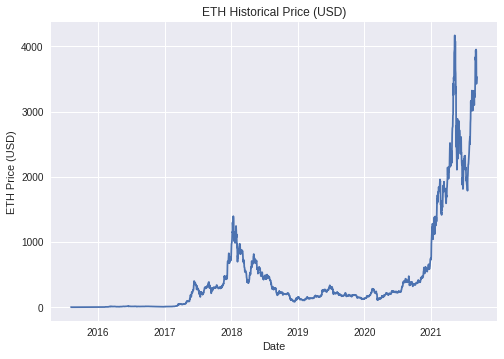

In [17]:
# PRICE CHART
plt.style.use('seaborn')
#plt.style.use('seaborn-whitegrid')
#plt.style.use('bmh')

 
fig, ax = plt.subplots()
 
ax.plot(historical_data_btc.index, historical_data_btc['ADJ CLOSE'])
#ax.set_yscale('symlog')
 
ax.set_xlabel('Date')
ax.set_ylabel(value_you_want +' Price (USD)')
ax.set_title(value_you_want + ' Historical Price (USD)')

plt.show()

In [18]:
'''
fig = px.line(historical_data_btc, x=historical_data_btc.index, y="ADJ CLOSE", title='Ethereum to USD Chart')
fig.show()
'''

fig = px.line(historical_data_btc, x=historical_data_btc.index, y="ADJ CLOSE", color='YEAR',height=500, title='Ethereum to USD Chart')
fig.show()

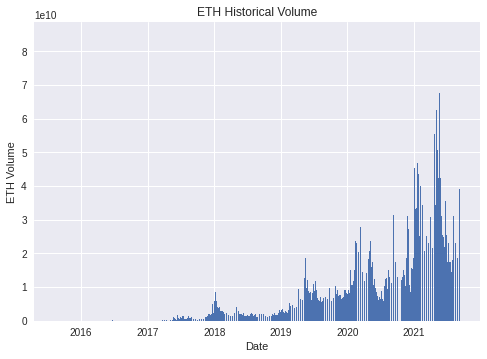

In [19]:
# VOLUME CHART
plt.style.use('seaborn')
 
fig, ax = plt.subplots()
 
ax.bar(historical_data_btc.index, historical_data_btc['VOLUME'])
 
ax.set_xlabel('Date')
ax.set_ylabel(value_you_want +' Volume')
ax.set_title(value_you_want +' Historical Volume')
 
plt.show()

In [20]:

'''
fig = px.bar(historical_data_btc, x=historical_data_btc.index, y="VOLUME", title='Ethereum Volume Chart')
fig.show()
'''

fig = px.bar(historical_data_btc, x=historical_data_btc.index, y="VOLUME", color='YEAR',height=500)
fig.show()

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(<Figure size 900x856.8 with 8 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ba2a41d90>,
       dtype=object))

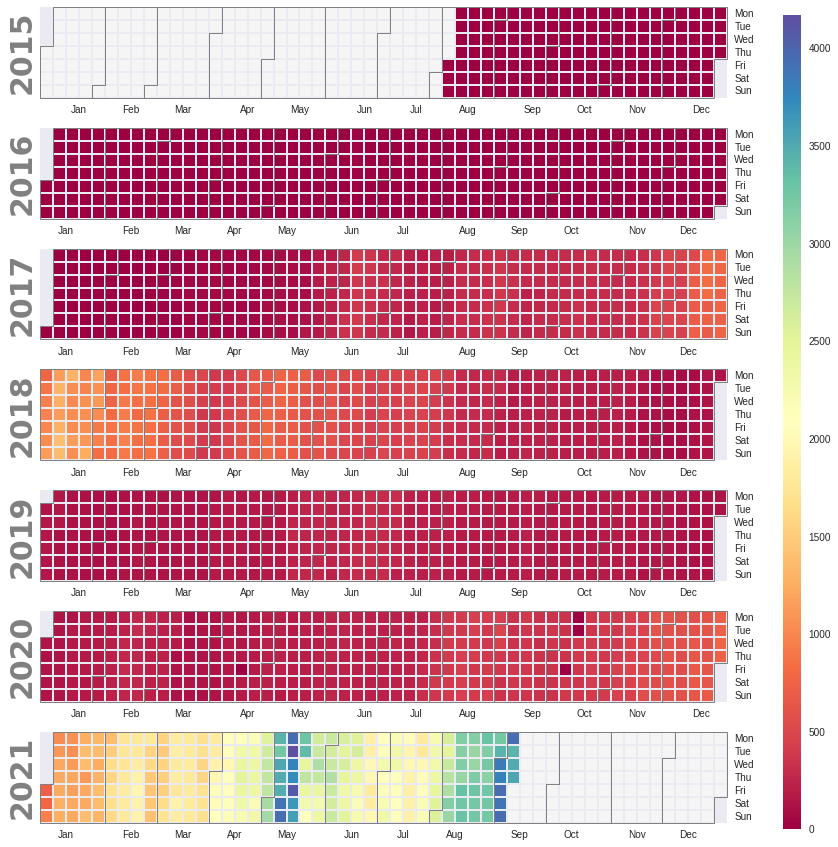

In [21]:
calplot.calplot(historical_data_btc['ADJ CLOSE'],cmap='Spectral')

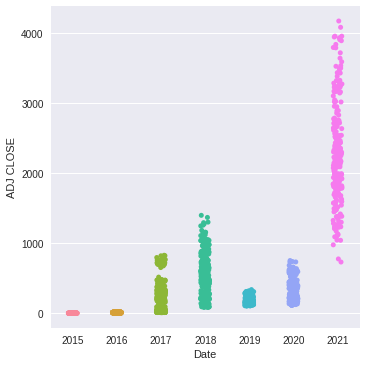

In [22]:
sns.catplot(x=pd.DatetimeIndex(historical_data_btc.index).year, y="ADJ CLOSE", data=historical_data_btc)
#pd.DatetimeIndex(Historical_data.index).year

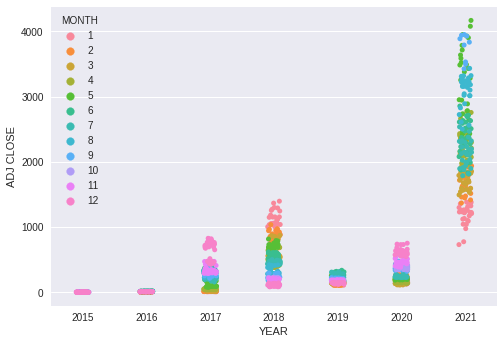

In [23]:
ax = sns.stripplot(x="YEAR", y="ADJ CLOSE", hue="MONTH", data=historical_data_btc)

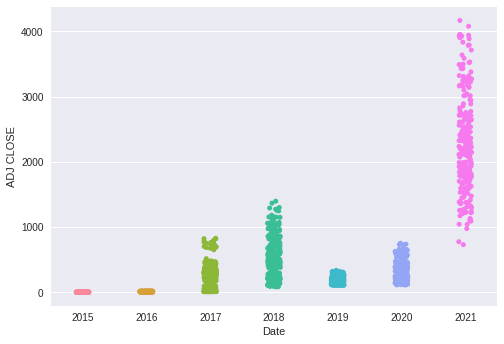

In [24]:
sns.stripplot(x=pd.DatetimeIndex(historical_data_btc.index).year, y="ADJ CLOSE", data=historical_data_btc)

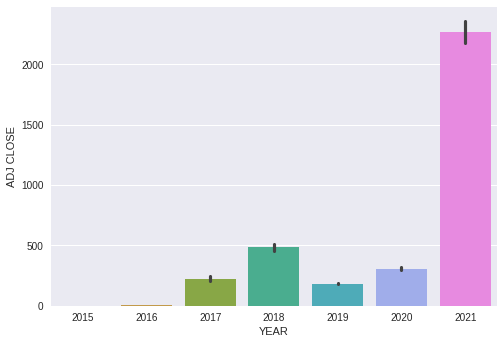

In [25]:
sns.barplot(x="YEAR", y="ADJ CLOSE", data=historical_data_btc)

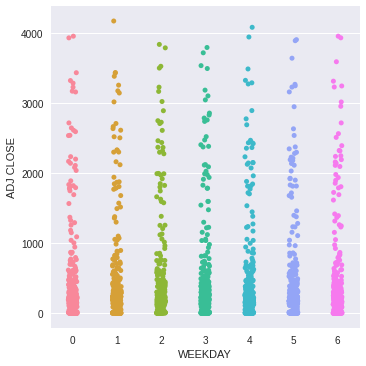

In [26]:
sns.catplot(x="WEEKDAY", y="ADJ CLOSE", data=historical_data_btc)

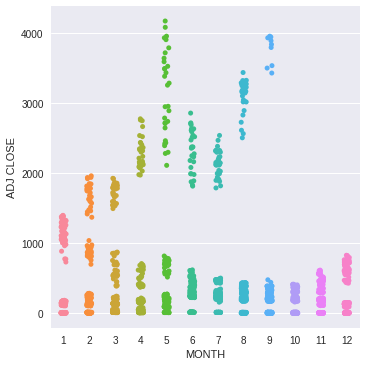

In [27]:
sns.catplot(x="MONTH", y="ADJ CLOSE", data=historical_data_btc)

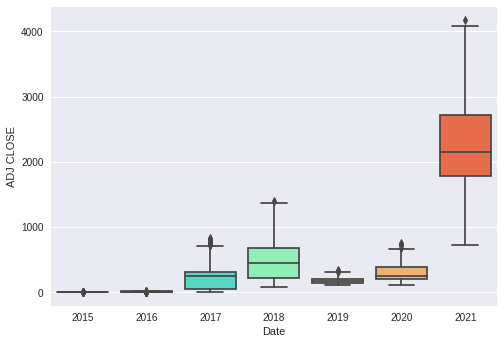

In [28]:
sns.boxplot(x=pd.DatetimeIndex(historical_data_btc.index).year,y='ADJ CLOSE',data=historical_data_btc,palette='rainbow')

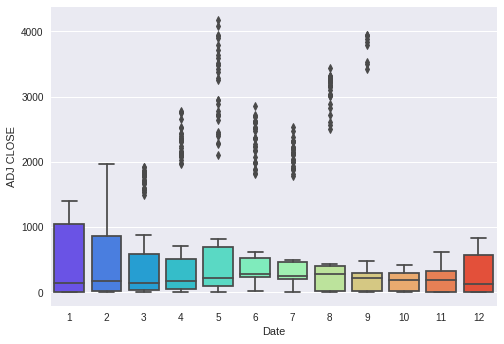

In [29]:
sns.boxplot(x=pd.DatetimeIndex(historical_data_btc.index).month,y='ADJ CLOSE',data=historical_data_btc,palette='rainbow')

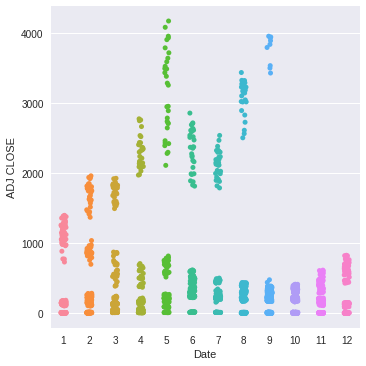

In [30]:
sns.catplot(x=pd.DatetimeIndex(historical_data_btc.index).month, y="ADJ CLOSE", data=historical_data_btc)

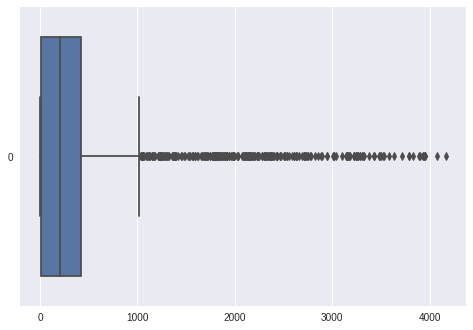

In [31]:
# Box plot
plt.style.use('seaborn')
ax = sns.boxplot(data=historical_data_btc['ADJ CLOSE'], orient="h")

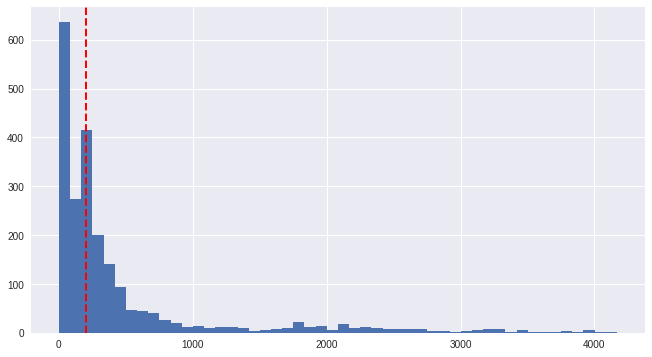

In [32]:
# Histogram of BTC closing price
historical_data_btc['ADJ CLOSE'].hist(bins=50, figsize=(11,6)).axvline(historical_data_btc['ADJ CLOSE'].median(), color='r', linestyle='dashed', linewidth=2)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

93.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

97.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

75.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

62.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

90.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.p

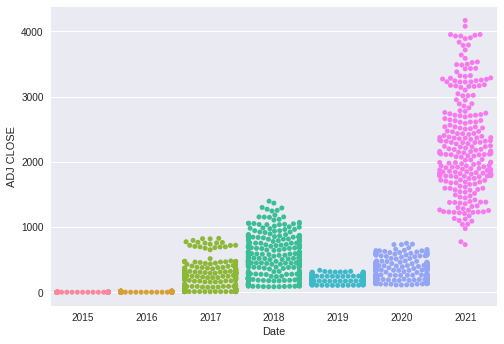

In [33]:
sns.swarmplot(x=pd.DatetimeIndex(historical_data_btc.index).year, y="ADJ CLOSE", data=historical_data_btc)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

73.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

62.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

65.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning:

61.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.p

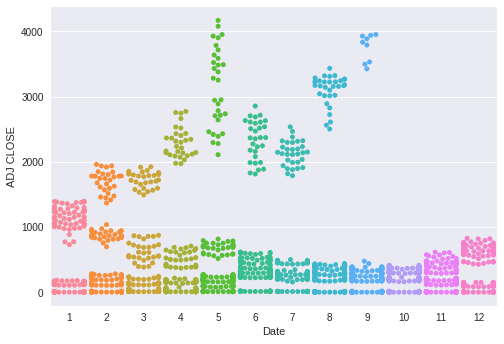

In [34]:
sns.swarmplot(x=pd.DatetimeIndex(historical_data_btc.index).month, y="ADJ CLOSE", data=historical_data_btc)

In [35]:
#sns.swarmplot(x="year", y="ADJ CLOSE", hue="month",data=historical_data_btc)

In [36]:
#sns.swarmplot(x="year",y="ADJ CLOSE",hue='month',data=historical_data_btc,palette="Set1", split=True)

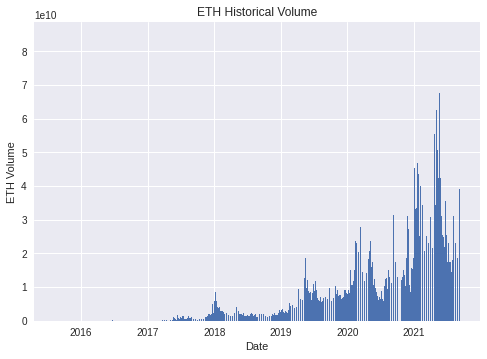

In [37]:
# VOLUME CHART
plt.style.use('seaborn')
 
fig, ax = plt.subplots()
 
ax.bar(historical_data_btc.index, historical_data_btc['VOLUME'])
 
ax.set_xlabel('Date')
ax.set_ylabel(value_you_want +' Volume')
ax.set_title(value_you_want +' Historical Volume')

#ax.set(yscale="log")
 
plt.show()

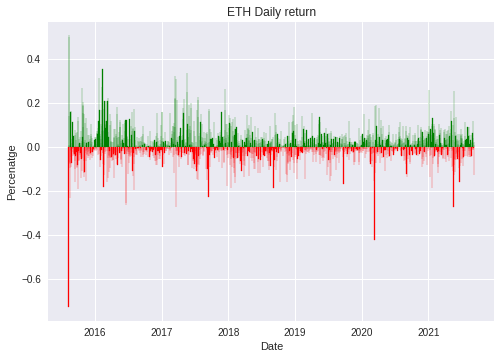

In [38]:
# DAILY RETURNS

plt.style.use('seaborn')
#plt.style.use('dark_background')
 
fig, ax = plt.subplots()
 
ax.bar(historical_data_btc.index, historical_data_btc['DAILY RETURN'])
for bar in ax.patches:
    if bar.get_height() >= 0:
        bar.set_color('green')    
    else:
        bar.set_color('red')
 
ax.set_xlabel('Date')
ax.set_ylabel('Percenatge')
ax.set_title(value_you_want +' Daily return')
 
plt.show()

In [39]:
fig = px.scatter(historical_data_btc, x=historical_data_btc.index, y="DAILY RETURN", color="TYPE")
fig.show()

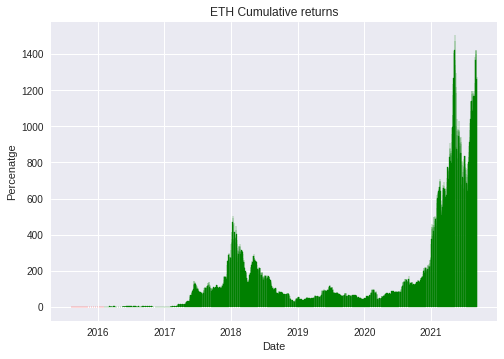

In [40]:
# CUMULATIVE RETURNS 

plt.style.use('seaborn')
 
fig, ax = plt.subplots()
 
ax.bar(historical_data_btc.index, historical_data_btc['CUMULATIVE RETURNS'])
for bar in ax.patches:
    if bar.get_height() >= 0:
        bar.set_color('green')    
    else:
        bar.set_color('red')
 
ax.set_xlabel('Date')
ax.set_ylabel('Percenatge')
ax.set_title(value_you_want +' Cumulative returns')
plt.show()

In [41]:
# MONTHLY RETURNS
# PIVOT TABLE

monthly_returns = historical_data_btc['ADJ CLOSE'].resample('M').ffill().pct_change() #quizas sea mejor multiplicar por 100 para que sea mas facil interpretar la info...
#monthly_returns
 
# Cambiar la Serie monthly_retuns a DataFrame para luego crear una PivotTable. Con el PivotTable crear un HeatMap
df = monthly_returns.to_frame()
#df

# Crear columnas Mes y Año
df['MONTH'] = pd.DatetimeIndex(df.index).month
df['YEAR'] = pd.DatetimeIndex(df.index).year
#df
 
# Crear PivotTable de Retornos Mensuales
pivot_table = df.pivot('MONTH','YEAR','ADJ CLOSE')
pivot_table

YEAR,2015,2016,2017,2018,2019,2020,2021
MONTH,,,,,,,
1,NaN,1.470205,0.346137,0.477813,-0.197253,0.390008,0.782299
2,NaN,1.747996,0.474453,-0.235276,0.277274,0.220295,0.076855
3,NaN,0.799514,2.163474,-0.536415,0.034866,-0.392338,0.354729
4,NaN,-0.227081,0.579246,0.689777,0.145936,0.553982,0.445612
5,NaN,0.597156,1.919077,-0.137745,0.653327,0.112589,-0.021009
6,NaN,-0.114781,0.278525,-0.212007,0.084227,-0.020178,-0.162212
7,NaN,-0.046993,-0.308715,-0.046823,-0.247825,0.526875,0.115039
8,NaN,-0.017136,0.878845,-0.347717,-0.211221,0.259076,0.353883
9,-0.456176,0.132997,-0.212971,-0.177227,0.042920,-0.172514,0.028616


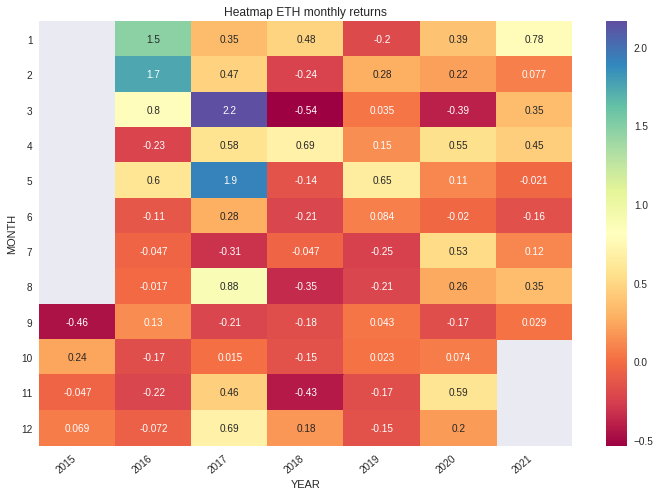

In [42]:
# HEATMAP
 
# Medidas
plt.figure(figsize=(10,7))
 
# Titulo
plt.title('Heatmap ' + value_you_want +' monthly returns')
 
# Grafico
ax = sns.heatmap(pivot_table, annot=True, cmap='Spectral') # Econtrar un mejor color...
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right",)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right",)
plt.tight_layout()
plt.show()

# Julio +170% 
# Agosto +140% so far...

In [43]:
# MONTHLY RETURNS
# PIVOT TABLE

monthly_returns = historical_data_btc['ADJ CLOSE'].resample('M').ffill().pct_change() #quizas sea mejor multiplicar por 100 para que sea mas facil interpretar la info...
#monthly_returns
 
# Cambiar la Serie monthly_retuns a DataFrame para luego crear una PivotTable. Con el PivotTable crear un HeatMap
df = monthly_returns.to_frame()
#df

# Crear columnas Mes y Año
df['MONTH'] = pd.DatetimeIndex(df.index).month
df['YEAR'] = pd.DatetimeIndex(df.index).year
#df
 
# Crear PivotTable de Retornos Mensuales
pivot_table = df.pivot('YEAR','MONTH','ADJ CLOSE')
pivot_table

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
YEAR,,,,,,,,,,,,
2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.456176,0.240959,-0.047465,0.069204
2016,1.470205,1.747996,0.799514,-0.227081,0.597156,-0.114781,-0.046993,-0.017136,0.132997,-0.168365,-0.219187,-0.072016
2017,0.346137,0.474453,2.163474,0.579246,1.919077,0.278525,-0.308715,0.878845,-0.212971,0.014642,0.461735,0.692483
2018,0.477813,-0.235276,-0.536415,0.689777,-0.137745,-0.212007,-0.046823,-0.347717,-0.177227,-0.152318,-0.426635,0.178462
2019,-0.197253,0.277274,0.034866,0.145936,0.653327,0.084227,-0.247825,-0.211221,0.042920,0.022765,-0.170831,-0.150314
2020,0.390008,0.220295,-0.392338,0.553982,0.112589,-0.020178,0.526875,0.259076,-0.172514,0.073795,0.590424,0.199988
2021,0.782299,0.076855,0.354729,0.445612,-0.021009,-0.162212,0.115039,0.353883,0.028616,NaN,NaN,NaN


In [44]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["red", "yellow", "green"], N=5) 
#c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
#v = [0,.15,.4,.5,0.6,.9,1.]
#l = list(zip(v,c))
#cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

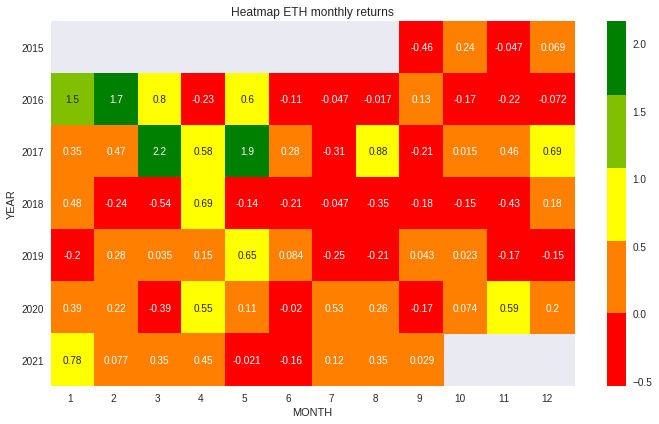

In [45]:
# HEATMAP
 
# Medidas
plt.figure(figsize=(10,6))
 
# Titulo
plt.title('Heatmap ' + value_you_want +' monthly returns')
 
# Grafico
ax = sns.heatmap(pivot_table, annot=True, cmap=cmap) # Econtrar un mejor color...
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha="right",)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right",)
plt.tight_layout()
plt.show()

# rocket_r
# flare
# mako
# crest
# viridis
# Spectral


In [46]:
# PRECIO MINIMO, MAXIMO Y PROMEDIO POR AÑO
info_anual = historical_data_btc.resample('Y',convention='end')['ADJ CLOSE'].agg(['min','max','mean','median'])
info_anual

,min,max,mean,median
Date,,,,
2015-12-31,0.434829,2.772120,0.942731,0.903885
2016-12-31,0.937124,20.588600,9.778040,10.896350
2017-12-31,8.172570,826.822998,223.915208,245.332001
2018-12-31,84.308296,1396.420044,483.507727,453.917999
2019-12-31,104.535301,336.753174,181.770137,173.889969
2020-12-31,110.605873,751.618958,307.338832,244.668922
2021-12-31,730.367554,4168.701172,2265.678897,2144.958984


In [47]:
# PRECIO MINIMO, MAXIMO, PROMEDIO Y MEDIANA POR MES

info_mensual = historical_data_btc.resample('M',convention='end')['ADJ CLOSE'].agg(['min','max','mean','median'])
info_mensual.tail(15)

,min,max,mean,median
Date,,,,
2020-07-31,225.387070,345.554657,259.405542,240.984985
2020-08-31,370.671722,437.397827,402.153482,395.835144
2020-09-30,320.585541,477.051910,368.336064,362.430786
2020-10-31,341.021149,413.772980,376.127476,377.827759
2020-11-30,383.156738,614.842529,486.144514,467.295486
2020-12-31,545.797363,751.618958,622.488431,609.817871
2021-01-31,730.367554,1391.609375,1201.393435,1230.990601
2021-02-28,1369.040527,1960.164795,1699.808921,1745.430115
2021-03-31,1492.608765,1924.685425,1736.862222,1782.855103


In [48]:
# Importar archivo con la informacion. En este caso es un GSheets
valor_dolar = 'https://docs.google.com/spreadsheets/d/1yxK80mrdmEw69pm_KDJODkwZYmy6wfjB8p36pmN8GjI/edit#gid=0'

# Modificar la URL
valor_dolar_dos = valor_dolar.replace('/edit#gid=', '/export?format=csv&gid=')

# Leer el archivo con la informacion
valor_dolar_tres = pd.read_csv(valor_dolar_dos)

# Mostrar la informacion en pantalla
valor_dolar_tres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         2995 non-null   object 
 1   BNA Compra   2995 non-null   float64
 2   BNA Venta    2995 non-null   float64
 3   Blue Compra  2995 non-null   float64
 4   Blue Venta   2995 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.1+ KB


In [49]:
# Cambiar 'Date' de object a Datetime
valor_dolar_tres['Date'] = pd.to_datetime(valor_dolar_tres['Date'])
valor_dolar_tres.head(2)

,Date,BNA Compra,BNA Venta,Blue Compra,Blue Venta
0,2013-01-01,4.89,4.92,6.89,6.91
1,2013-01-02,4.90,4.93,6.89,6.91


In [50]:
resultado = historical_data_btc.merge(valor_dolar_tres,on='Date')
#resultado[['Document Date','Dolar']].tail(15)

resultado.info()

#resultado.head(3)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2043 non-null   datetime64[ns]
 1   OPEN                2043 non-null   float64       
 2   HIGH                2043 non-null   float64       
 3   LOW                 2043 non-null   float64       
 4   Close               2043 non-null   float64       
 5   ADJ CLOSE           2043 non-null   float64       
 6   VOLUME              2043 non-null   int64         
 7   DAILY CHANGE        2042 non-null   float64       
 8   DAILY RETURN        2042 non-null   float64       
 9   VOLUME CHANGE       2042 non-null   float64       
 10  VOLUME CHANGE PCT   2042 non-null   float64       
 11  CUMULATIVE RETURNS  2042 non-null   float64       
 12  YEAR                2043 non-null   int64         
 13  MONTH               2043 non-null   int64       

In [51]:
# Set Index
 
resultado_ind = resultado.set_index('Date')
resultado_ind.head(3)

,OPEN,HIGH,LOW,Close,ADJ CLOSE,VOLUME,DAILY CHANGE,DAILY RETURN,VOLUME CHANGE,VOLUME CHANGE PCT,CUMULATIVE RETURNS,YEAR,MONTH,DAY,WEEKDAY,TYPE,BNA Compra,BNA Venta,Blue Compra,Blue Venta
Date,,,,,,,,,,,,,,,,,,,,
2015-08-07,2.831620,3.53661,2.521120,2.772120,2.772120,164329,NaN,NaN,NaN,NaN,NaN,2015,8,7,4,Negativo,9.12,9.22,14.87,14.92
2015-08-08,2.793760,2.79881,0.714725,0.753325,0.753325,674188,-2.018795,-0.728250,509859.0,3.102672,-0.728250,2015,8,8,5,Negativo,9.12,9.22,14.87,14.92
2015-08-09,0.706136,0.87981,0.629191,0.701897,0.701897,532170,-0.051428,-0.068268,-142018.0,-0.210650,-0.746801,2015,8,9,6,Negativo,9.12,9.22,14.87,14.92


In [52]:
# PRECIO MINIMO, MAXIMO, PROMEDIO Y MEDIANA POR MES

info_mensual_dolar = resultado_ind.resample('M',convention='end')['ADJ CLOSE','Blue Venta'].agg(['mean'])
info_mensual_dolar.tail(12)

,ADJ CLOSE,Blue Venta
,mean,mean
Date,,
2020-04-30,171.957624,92.034483
2020-05-31,208.125855,125.958065
2020-06-30,236.159229,126.081667
2020-07-31,259.405542,130.764516
2020-08-31,402.153482,134.170968
2020-09-30,368.336064,137.685000
2020-10-31,376.127476,171.412500
2020-11-30,486.144514,161.066667


In [53]:
#Valor promedio al domingo de cada semana
info_semanal_dolar = resultado_ind.resample('W',convention='end')['ADJ CLOSE','Blue Venta'].agg(['mean'])
info_semanal_dolar.tail(15)

,ADJ CLOSE,Blue Venta
,mean,mean
Date,,
2020-12-06,597.869489,151.785714
2020-12-13,569.122384,148.428571
2020-12-20,629.545462,150.142857
2020-12-27,626.411813,156.714286
2021-01-03,775.964294,165.571429
2021-01-10,1191.507220,161.428571
2021-01-17,1159.759539,159.142857
2021-01-24,1285.361799,156.571429
